In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import astroquery
from tqdm import trange, tqdm

sys.path.append("../")
import csiborgtools

%matplotlib widget 
%load_ext autoreload
%autoreload 2

In [38]:
# # Norma
cluster = {"RA": (16 + 15 / 60 + 32.8 / 60**2) * 15,
           "DEC": -60 + 54 / 60 + 30 / 60**2,
           "DIST": 67.8}

Xclust = np.array([cluster["DIST"], cluster["RA"], cluster["DEC"]]).reshape(1, -1)

In [39]:
paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)
nsims = paths.get_ics(False)

In [29]:
Xclust = np.array([cluster["DIST"], cluster["RA"], cluster["DEC"]]).reshape(1, -1)

In [33]:
matches = np.full(len(nsims), np.nan)

for ii in trange(101):
    cat = csiborgtools.read.HaloCatalogue(nsims[ii], paths, minmass=('M', 1e13))
    dist, ind = cat.angular_neighbours(Xclust, ang_radius=5, rad_tolerance=10)
    dist = dist[0]
    ind = ind[0]

    if ind.size > 0:
        matches[ii] = np.max(cat['M'][ind])


100%|██████████| 101/101 [00:44<00:00,  2.25it/s]


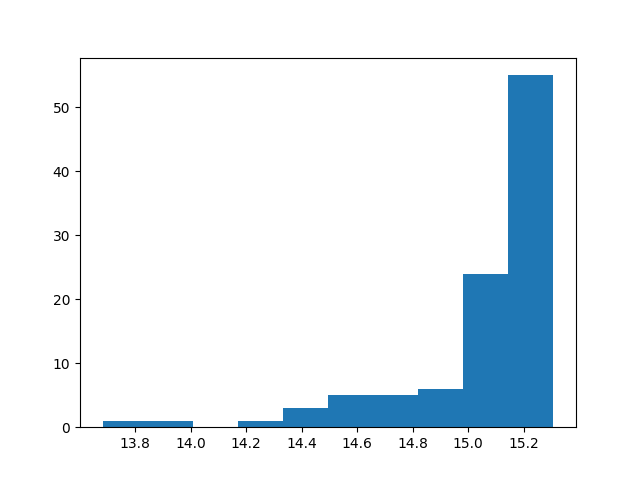

In [37]:
x = np.log10(matches[~np.isnan(matches)])


plt.figure()
plt.hist(x, bins=10)
plt.show()